In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from gtts import gTTS
import IPython.display as ipd
from tqdm import tqdm
import pandas as pd


In [2]:
def extract_hand_landmarks(image_path):
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return None
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    hands.close()
    if results.multi_hand_landmarks:
        landmarks = []
        for lm in results.multi_hand_landmarks[0].landmark:
            landmarks.extend([lm.x, lm.y, lm.z])
        return np.array(landmarks)
    else:
        return None


In [3]:
import glob

def process_dataset(dataset_root):
    features = []
    labels = []
    class_names = sorted(os.listdir(dataset_root))
    class_to_idx = {cls_name: idx for idx, cls_name in enumerate(class_names)}
    print("Class mapping:", class_to_idx)
    
    for cls_name in class_names:
        cls_folder = os.path.join(dataset_root, cls_name)
        image_paths = glob.glob(os.path.join(cls_folder, "*.jpg"))
        print(f"Processing {cls_name} ({len(image_paths)} images)")
        success_count = 0
        fail_count = 0
        for img_path in tqdm(image_paths):
            lm = extract_hand_landmarks(img_path)
            if lm is not None:
                features.append(lm)
                labels.append(class_to_idx[cls_name])
                success_count += 1
            else:
                fail_count += 1
                if fail_count < 5:  # Print first few failures
                    print(f"Failed to detect hand in: {img_path}")
        print(f"Success: {success_count}, Failed: {fail_count}")
    
    features = np.array(features)
    labels = np.array(labels)
    print(f"Total samples: {features.shape[0]}")
    # Save features and labels
    np.save(os.path.join(dataset_root, "features.npy"), features)
    np.save(os.path.join(dataset_root, "labels.npy"), labels)
    print("Saved features and labels as .npy files.")
    return class_to_idx
   






In [28]:
# Example usage for Indian Sign Language dataset: Already done
dataset_root = "../data/indian_sign_language/Indian"  # Adjust path if needed
class_to_idx = process_dataset(dataset_root)

Class mapping: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
Processing 0 (1501 images)


  1%|          | 8/1501 [00:00<01:36, 15.43it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\0\1000.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\0\1001.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\0\1002.jpg


  1%|          | 14/1501 [00:00<01:40, 14.81it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\0\1006.jpg


100%|██████████| 1501/1501 [01:41<00:00, 14.77it/s]


Success: 1275, Failed: 226
Processing 1 (1504 images)


 40%|████      | 604/1504 [00:39<00:59, 15.18it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\1\187.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\1\188.jpg


 41%|████▏     | 622/1504 [00:40<00:59, 14.93it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\1\201.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\1\204.jpg


100%|██████████| 1504/1504 [01:39<00:00, 15.05it/s]


Success: 1437, Failed: 67
Processing 2 (1502 images)


  6%|▋         | 96/1502 [00:06<01:33, 15.03it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\2\1082.jpg


 15%|█▌        | 228/1502 [00:15<01:23, 15.31it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\2\120.jpg


 24%|██▍       | 358/1502 [00:23<01:12, 15.84it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\2\1318.jpg


 37%|███▋      | 560/1502 [00:37<01:05, 14.29it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\2\15.jpg


100%|██████████| 1502/1502 [01:38<00:00, 15.21it/s]


Success: 1495, Failed: 7
Processing 3 (1502 images)


  2%|▏         | 26/1502 [00:01<01:25, 17.22it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\3\1019.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\3\1020.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\3\1021.jpg


  2%|▏         | 33/1502 [00:01<01:25, 17.13it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\3\1024.jpg


100%|██████████| 1502/1502 [01:28<00:00, 16.91it/s]


Success: 1278, Failed: 224
Processing 4 (1505 images)


 11%|█         | 167/1505 [00:10<01:13, 18.32it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\4\1144.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\4\1145.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\4\1146.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\4\1147.jpg


100%|██████████| 1505/1505 [01:30<00:00, 16.67it/s]


Success: 1476, Failed: 29
Processing 5 (1502 images)


  3%|▎         | 48/1502 [00:02<01:25, 17.07it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\5\1037.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\5\1038.jpg


  5%|▌         | 77/1502 [00:04<01:17, 18.29it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\5\1062.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\5\1063.jpg


100%|██████████| 1502/1502 [01:28<00:00, 16.94it/s]


Success: 1354, Failed: 148
Processing 6 (1507 images)


  1%|▏         | 20/1507 [00:01<01:24, 17.49it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\6\1013.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\6\1014.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\6\1015.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\6\1016.jpg


100%|██████████| 1507/1507 [01:28<00:00, 17.12it/s]


Success: 1307, Failed: 200
Processing 7 (1601 images)


  0%|          | 2/1601 [00:00<01:27, 18.23it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\7\0.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\7\10.jpg
Failed to detect hand in: ../data/indian_sign_language/Indian\7\100.jpg


  0%|          | 5/1601 [00:00<01:21, 19.59it/s]

Failed to detect hand in: ../data/indian_sign_language/Indian\7\1000.jpg


100%|██████████| 1601/1601 [01:23<00:00, 19.17it/s]


Success: 491, Failed: 1110
Processing 8 (1500 images)


100%|██████████| 1500/1500 [01:30<00:00, 16.62it/s]


Success: 1500, Failed: 0
Processing 9 (1501 images)


100%|██████████| 1501/1501 [01:30<00:00, 16.64it/s]

Success: 1501, Failed: 0
Total samples: 13114
Saved features and labels as .npy files.


In [ ]:
# Process the gestures_dataset folder already done
gestures_dataset_root = "../data/gestures_dataset"  # Adjust path if needed
print("Processing custom gestures dataset...")
gestures_class_to_idx = process_dataset(gestures_dataset_root)


Processing custom gestures dataset...
Class mapping: {'Fist': 0, 'I Love You': 1, 'Perfect': 2, 'Stop': 3, 'Thumbs Down': 4, 'Thumbs Up': 5}
Processing Fist (1504 images)


 30%|███       | 456/1504 [00:31<01:10, 14.82it/s]

Failed to detect hand in: ../data/gestures_dataset\Fist\1405.jpg


 59%|█████▉    | 890/1504 [01:01<00:37, 16.43it/s]

Failed to detect hand in: ../data/gestures_dataset\Fist\442.jpg
Failed to detect hand in: ../data/gestures_dataset\Fist\443.jpg
Failed to detect hand in: ../data/gestures_dataset\Fist\444.jpg


100%|██████████| 1504/1504 [01:42<00:00, 14.68it/s]


Success: 1489, Failed: 15
Processing I Love You (3048 images)


100%|██████████| 3048/3048 [03:18<00:00, 15.32it/s]


Success: 3048, Failed: 0
Processing Perfect (3039 images)


  8%|▊         | 240/3039 [00:15<02:56, 15.81it/s]

Failed to detect hand in: ../data/gestures_dataset\Perfect\121.jpg


 12%|█▏        | 350/3039 [00:23<02:59, 14.95it/s]

Failed to detect hand in: ../data/gestures_dataset\Perfect\1309.jpg


 34%|███▎      | 1022/3039 [01:07<02:02, 16.41it/s]

Failed to detect hand in: ../data/gestures_dataset\Perfect\1915.jpg
Failed to detect hand in: ../data/gestures_dataset\Perfect\1916.jpg


100%|██████████| 3039/3039 [03:19<00:00, 15.25it/s]


Success: 2963, Failed: 76
Processing Stop (1503 images)


  5%|▍         | 72/1503 [00:04<01:25, 16.78it/s]

Failed to detect hand in: ../data/gestures_dataset\Stop\1059.jpg
Failed to detect hand in: ../data/gestures_dataset\Stop\1060.jpg
Failed to detect hand in: ../data/gestures_dataset\Stop\1061.jpg


  5%|▌         | 76/1503 [00:04<01:24, 16.87it/s]

Failed to detect hand in: ../data/gestures_dataset\Stop\1062.jpg


100%|██████████| 1503/1503 [01:35<00:00, 15.79it/s]


Success: 1353, Failed: 150
Processing Thumbs Down (3002 images)


100%|██████████| 3002/3002 [03:15<00:00, 15.35it/s]


Success: 3002, Failed: 0
Processing Thumbs Up (3001 images)


  1%|          | 16/3001 [00:01<03:01, 16.45it/s]

Failed to detect hand in: ../data/gestures_dataset\Thumbs Up\1008.jpg
Failed to detect hand in: ../data/gestures_dataset\Thumbs Up\1009.jpg
Failed to detect hand in: ../data/gestures_dataset\Thumbs Up\1010.jpg


  1%|          | 20/3001 [00:01<03:03, 16.26it/s]

Failed to detect hand in: ../data/gestures_dataset\Thumbs Up\1011.jpg


100%|██████████| 3001/3001 [04:17<00:00, 11.65it/s]

Success: 2833, Failed: 168
Total samples: 14688
Saved features and labels as .npy files.


In [50]:
gestures_class_to_idx

{'Fist': 0,
 'I Love You': 1,
 'Perfect': 2,
 'Stop': 3,
 'Thumbs Down': 4,
 'Thumbs Up': 5}

In [51]:
class_to_idx

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [ ]:
os.makedirs("../checkpoints", exist_ok=True)

# You can also save any important variables
import pickle
with open("../checkpoints/variables.pkl", "wb") as f:
    pickle.dump({
        "class_to_idx": class_to_idx,
        "gestures_class_to_idx": gestures_class_to_idx
        # Add any other variables you want to save
    }, f)


In [5]:
import os
import pickle
import numpy as np
import torch

# Check if checkpoint exists and load it
checkpoint_path = "../checkpoints/variables.pkl"
if os.path.exists(checkpoint_path):
    with open(checkpoint_path, "rb") as f:
        checkpoint_data = pickle.load(f)
    
    # Restore variables
    class_to_idx = checkpoint_data.get('class_to_idx')
    gestures_class_to_idx = checkpoint_data.get('gestures_class_to_idx')
    
    print("Previous session state restored successfully!")
    print(f"Indian Sign Language classes: {len(class_to_idx) if class_to_idx else 0}")
    print(f"Custom Gestures classes: {len(gestures_class_to_idx) if gestures_class_to_idx else 0}")
else:
    print("No checkpoint found. You'll need to rerun the preprocessing steps.")


isl_features_path = "../data/indian_sign_language/Indian/features.npy"
isl_labels_path = "../data/indian_sign_language/Indian/labels.npy"
gestures_features_path = "../data/gestures_dataset/features.npy"
gestures_labels_path = "../data/gestures_dataset/labels.npy"

# Check if files exist
isl_data_exists = os.path.exists(isl_features_path) and os.path.exists(isl_labels_path)
gestures_data_exists = os.path.exists(gestures_features_path) and os.path.exists(gestures_labels_path)

print(f"Indian Sign Language processed data available: {isl_data_exists}")
print(f"Custom Gestures processed data available: {gestures_data_exists}")


if isl_data_exists:
    # Load a small sample to verify data integrity
    features_sample = np.load(isl_features_path)[:5]
    labels_sample = np.load(isl_labels_path)[:5]
    print(f"ISL Features shape: {features_sample.shape}")
    print(f"ISL Labels sample: {labels_sample}")


Previous session state restored successfully!
Indian Sign Language classes: 10
Custom Gestures classes: 6
Indian Sign Language processed data available: True
Custom Gestures processed data available: True
ISL Features shape: (5, 63)
ISL Labels sample: [0 0 0 0 0]


In [26]:
gestures_class_to_idx

{'Fist': 0,
 'I Love You': 1,
 'Perfect': 2,
 'Stop': 3,
 'Thumbs Down': 4,
 'Thumbs Up': 5}

In [4]:
def combine_preprocessed_datasets():
    # Load Indian Sign Language dataset
    isl_features_path = "../data/indian_sign_language/Indian/features.npy"
    isl_labels_path = "../data/indian_sign_language/Indian/labels.npy"
    isl_features = np.load(isl_features_path)
    isl_labels = np.load(isl_labels_path)
    
    # Load custom gestures dataset
    gestures_features_path = "../data/gestures_dataset/features.npy"
    gestures_labels_path = "../data/gestures_dataset/labels.npy"
    gestures_features = np.load(gestures_features_path)
    gestures_labels = np.load(gestures_labels_path)
    
    # Load class mappings
    with open("../checkpoints/variables.pkl", "rb") as f:
        checkpoint_data = pickle.load(f)
    
    isl_class_to_idx = checkpoint_data['class_to_idx']
    gestures_class_to_idx = checkpoint_data['gestures_class_to_idx']
    
    unified_class_to_idx = isl_class_to_idx.copy()
    
    
    offset = len(isl_class_to_idx)
    for gesture_class, idx in gestures_class_to_idx.items():
        unified_class_to_idx[f"gesture_{gesture_class}"] = idx + offset
    
    
    adjusted_gestures_labels = gestures_labels + offset
    
    
    combined_features = np.vstack((isl_features, gestures_features))
    combined_labels = np.concatenate((isl_labels, adjusted_gestures_labels))
    
    print(f"ISL dataset: {len(isl_labels)} samples")
    print(f"Gestures dataset: {len(gestures_labels)} samples")
    print(f"Combined dataset: {len(combined_labels)} samples")
    print(f"Total number of classes: {len(unified_class_to_idx)}")
    
    
    os.makedirs("../data/combined_dataset", exist_ok=True)
    np.save("../data/combined_dataset/features.npy", combined_features)
    np.save("../data/combined_dataset/labels.npy", combined_labels)
    
   
    with open("../data/combined_dataset/class_mapping.pkl", "wb") as f:
        pickle.dump(unified_class_to_idx, f)
    
    return combined_features, combined_labels, unified_class_to_idx


In [ ]:
combined_features, combined_labels, unified_class_to_idx = combine_preprocessed_datasets()

ISL dataset: 13114 samples
Gestures dataset: 14688 samples
Combined dataset: 27802 samples
Total number of classes: 16


In [ ]:
# Create a directory for saving if it doesn't exist
os.makedirs("../checkpoints", exist_ok=True)


import pickle
with open("../checkpoints/variables.pkl", "wb") as f:
    pickle.dump({
        "class_to_idx": class_to_idx,
        "gestures_class_to_idx": gestures_class_to_idx,
        "unified_class_to_idx":unified_class_to_idx
        # Add any other variables you want to save
    }, f)

In [5]:
import pickle
checkpoint_path = "../checkpoints/variables.pkl"
if os.path.exists(checkpoint_path):
    with open(checkpoint_path, "rb") as f:
        checkpoint_data = pickle.load(f)
    
    
    unified_class_to_idx = checkpoint_data.get('unified_class_to_idx')
    
    print("Previous session state restored successfully!")
    print(f"Combined dataset classes: {len(unified_class_to_idx) if unified_class_to_idx else 0}")

Previous session state restored successfully!
Combined dataset classes: 16


In [6]:
def reshape_landmarks_for_cnn(landmarks, grid_size=7):
    x_coords = landmarks[0::3]  # x coordinates
    y_coords = landmarks[1::3]  # y coordinates
    z_coords = landmarks[2::3]  # z coordinates
    
    # Create a spatial representation by placing landmarks in a grid
    x_channel = np.zeros((grid_size, grid_size))
    y_channel = np.zeros((grid_size, grid_size))
    z_channel = np.zeros((grid_size, grid_size))
    
    # Map the 21 landmarks to positions in the grid
    for i in range(21):
        x_idx = min(int(x_coords[i] * (grid_size-1)), grid_size-1)
        y_idx = min(int(y_coords[i] * (grid_size-1)), grid_size-1)
        
        x_channel[y_idx, x_idx] = x_coords[i]
        y_channel[y_idx, x_idx] = y_coords[i]
        z_channel[y_idx, x_idx] = z_coords[i]
    
    grid_representation = np.stack([x_channel, y_channel, z_channel], axis=0)
    return grid_representation



In [6]:
def preprocess_dataset_for_cnn(features_path, labels_path, grid_size=7):
    features = np.load(features_path)
    labels = np.load(labels_path)
    
    # Reshape all samples
    X = np.zeros((len(features), 3, grid_size, grid_size))
    for i in tqdm(range(len(features)), desc="Reshaping for CNN"):
        X[i] = reshape_landmarks_for_cnn(features[i], grid_size)
    
    return X, labels


In [9]:
features_path = "../data/combined_dataset/features.npy"
labels_path = "../data/combined_dataset/labels.npy"
grid_size = 7
X, labels = preprocess_dataset_for_cnn(features_path, labels_path, grid_size)


Reshaping for CNN: 100%|██████████| 27802/27802 [00:00<00:00, 36383.92it/s]


In [10]:
labels.shape

(27802,)

In [7]:
class GestureCNN(nn.Module):
    def __init__(self, num_classes, grid_size=7):
        super(GestureCNN, self).__init__()
        
        
        self.conv_layers = nn.Sequential(
            # First convolutional block
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Second convolutional block (reduced filters)
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        
        conv_output_size = max(1, grid_size // (2**2))
        
        
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * conv_output_size * conv_output_size, 64),  
            nn.ReLU(),
            nn.Dropout(0.2),  
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x




In [8]:
# Initialize the model
num_classes = 16  
grid_size = 7
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GestureCNN(num_classes=num_classes, grid_size=grid_size).to(device)

# Define loss function and optimizer with regularization
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)  # Added weight decay

# Print model summary
print(f"Model created with {num_classes} output classes")
print(f"Using device: {device}")
print(model)

Model created with 16 output classes
Using device: cuda
GestureCNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=32, out_features=64, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=64, out_features=16, bias=True)
  )
)


In [26]:
num_classes

16

In [9]:

class GestureDataset(Dataset):
    def __init__(self, features, labels, transform=None):
        self.features = features  # Already in shape (N, 3, grid_size, grid_size)
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        
        if self.transform:
            feature = self.transform(feature)
            
        return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


from sklearn.model_selection import train_test_split


dataset = GestureDataset(X, labels)


train_indices, val_indices = train_test_split(
    range(len(dataset)),
    test_size=0.3,  # 30% for validation
    random_state=42
)

from torch.utils.data.sampler import SubsetRandomSampler
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)


batch_size = 16
train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)

print(f"Dataset size: {len(dataset)}")
print(f"Training samples: {len(train_indices)}")
print(f"Validation samples: {len(val_indices)}")


for features, labels in train_loader:
    print(f"Batch features shape: {features.shape}")
    print(f"Batch labels shape: {labels.shape}")
    break


NameError: name 'X' is not defined

In [15]:

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_val_acc = 0.0
    best_model_wts = None
    
    # History for plotting
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]"):
            inputs, targets = inputs.to(device), targets.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
        
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
        
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        history['train_loss'].append(epoch_loss)
        history['train_acc'].append(epoch_acc)
        
        model.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for inputs, targets in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]"):
                inputs, targets = inputs.to(device), targets.to(device)
                
                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                
                running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total += targets.size(0)
                correct += (predicted == targets).sum().item()
        
        val_loss = running_loss / total
        val_acc = correct / total
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f"Epoch {epoch+1}/{num_epochs}: "
              f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_wts = model.state_dict().copy()
            print(f"New best model with validation accuracy: {val_acc:.4f}")
    
    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, history



In [18]:
num_epochs = 20

# Train the model
trained_model, history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)


Epoch 1/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 644.86it/s]


Epoch 1/20: Train Loss: 1.9521, Train Acc: 0.4310, Val Loss: 1.1453, Val Acc: 0.7390
New best model with validation accuracy: 0.7390


Epoch 2/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 743.96it/s]


Epoch 2/20: Train Loss: 0.8656, Train Acc: 0.7727, Val Loss: 0.5097, Val Acc: 0.8688
New best model with validation accuracy: 0.8688


Epoch 3/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 656.62it/s]


Epoch 3/20: Train Loss: 0.4811, Train Acc: 0.8714, Val Loss: 0.2900, Val Acc: 0.9281
New best model with validation accuracy: 0.9281


Epoch 4/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 662.52it/s]


Epoch 4/20: Train Loss: 0.3267, Train Acc: 0.9153, Val Loss: 0.2041, Val Acc: 0.9474
New best model with validation accuracy: 0.9474


Epoch 5/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 629.00it/s]


Epoch 5/20: Train Loss: 0.2473, Train Acc: 0.9354, Val Loss: 0.1534, Val Acc: 0.9609
New best model with validation accuracy: 0.9609


Epoch 6/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 699.94it/s]


Epoch 6/20: Train Loss: 0.1962, Train Acc: 0.9499, Val Loss: 0.1174, Val Acc: 0.9715
New best model with validation accuracy: 0.9715


Epoch 7/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 702.53it/s]


Epoch 7/20: Train Loss: 0.1612, Train Acc: 0.9596, Val Loss: 0.0929, Val Acc: 0.9766
New best model with validation accuracy: 0.9766


Epoch 8/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 776.09it/s]


Epoch 8/20: Train Loss: 0.1328, Train Acc: 0.9648, Val Loss: 0.0758, Val Acc: 0.9800
New best model with validation accuracy: 0.9800


Epoch 9/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 767.97it/s]


Epoch 9/20: Train Loss: 0.1148, Train Acc: 0.9715, Val Loss: 0.0641, Val Acc: 0.9831
New best model with validation accuracy: 0.9831


Epoch 10/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 749.71it/s]


Epoch 10/20: Train Loss: 0.0979, Train Acc: 0.9747, Val Loss: 0.0536, Val Acc: 0.9845
New best model with validation accuracy: 0.9845


Epoch 11/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 708.76it/s]


Epoch 11/20: Train Loss: 0.0874, Train Acc: 0.9785, Val Loss: 0.0498, Val Acc: 0.9861
New best model with validation accuracy: 0.9861


Epoch 12/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 745.46it/s]


Epoch 12/20: Train Loss: 0.0790, Train Acc: 0.9807, Val Loss: 0.0436, Val Acc: 0.9887
New best model with validation accuracy: 0.9887


Epoch 13/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 703.35it/s]


Epoch 13/20: Train Loss: 0.0674, Train Acc: 0.9832, Val Loss: 0.0380, Val Acc: 0.9889
New best model with validation accuracy: 0.9889


Epoch 14/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 725.56it/s]


Epoch 14/20: Train Loss: 0.0651, Train Acc: 0.9840, Val Loss: 0.0332, Val Acc: 0.9910
New best model with validation accuracy: 0.9910


Epoch 15/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 687.21it/s]


Epoch 15/20: Train Loss: 0.0553, Train Acc: 0.9863, Val Loss: 0.0301, Val Acc: 0.9926
New best model with validation accuracy: 0.9926


Epoch 16/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 762.08it/s]


Epoch 16/20: Train Loss: 0.0509, Train Acc: 0.9884, Val Loss: 0.0260, Val Acc: 0.9939
New best model with validation accuracy: 0.9939


Epoch 17/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 774.90it/s]


Epoch 17/20: Train Loss: 0.0437, Train Acc: 0.9892, Val Loss: 0.0238, Val Acc: 0.9935


Epoch 18/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 638.73it/s]


Epoch 18/20: Train Loss: 0.0425, Train Acc: 0.9886, Val Loss: 0.0237, Val Acc: 0.9941
New best model with validation accuracy: 0.9941


Epoch 19/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 859.05it/s]


Epoch 19/20: Train Loss: 0.0399, Train Acc: 0.9897, Val Loss: 0.0215, Val Acc: 0.9939


Epoch 20/20 [Val]: 100%|██████████| 522/522 [00:00<00:00, 656.81it/s]

Epoch 20/20: Train Loss: 0.0358, Train Acc: 0.9913, Val Loss: 0.0219, Val Acc: 0.9939


In [20]:
os.makedirs("../models", exist_ok=True)
torch.save({
    'model_state_dict': trained_model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'history': history,
    'class_mapping': unified_class_to_idx
}, "../models/gesture_recognition_model.pth")

print("Model training completed and saved!")


Model training completed and saved!


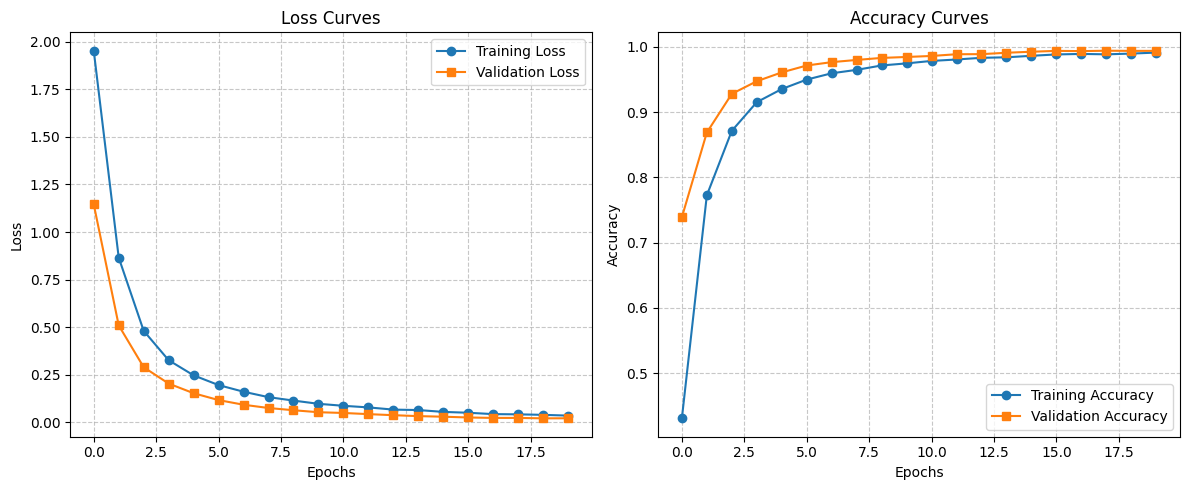

In [21]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training Loss', marker='o')
plt.plot(history['val_loss'], label='Validation Loss', marker='s')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training Accuracy', marker='o')
plt.plot(history['val_acc'], label='Validation Accuracy', marker='s')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('../models/learning_curves.png', dpi=300, bbox_inches='tight')
plt.show()


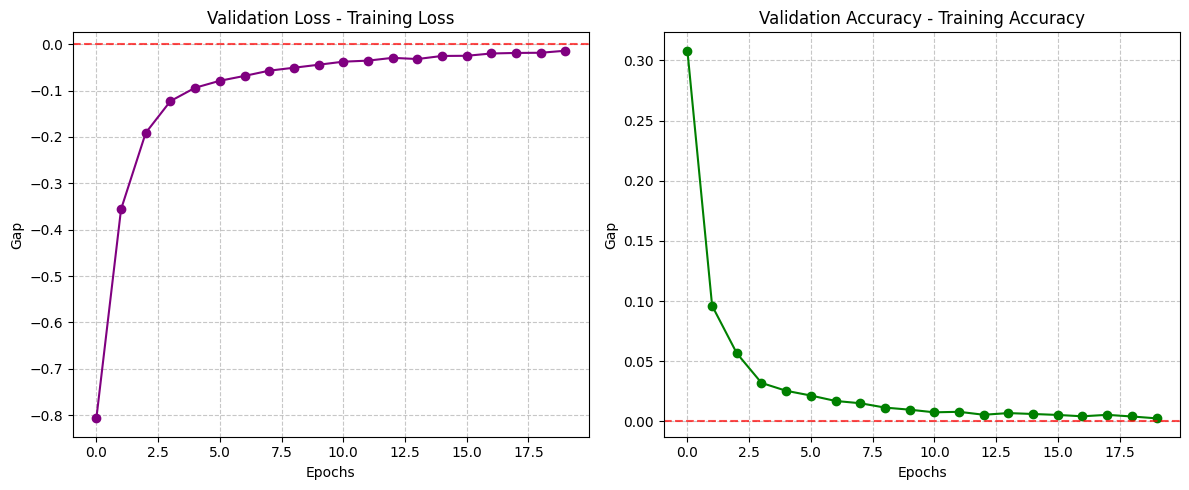

In [22]:
plt.figure(figsize=(12, 5))

# Loss Gap
plt.subplot(1, 2, 1)
loss_gap = [val - train for train, val in zip(history['train_loss'], history['val_loss'])]
plt.plot(loss_gap, marker='o', color='purple')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.title('Validation Loss - Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Gap')
plt.grid(True, linestyle='--', alpha=0.7)

# Accuracy Gap
plt.subplot(1, 2, 2)
acc_gap = [val - train for train, val in zip(history['train_acc'], history['val_acc'])]
plt.plot(acc_gap, marker='o', color='green')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.title('Validation Accuracy - Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Gap')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('../models/metric_gaps.png', dpi=300, bbox_inches='tight')
plt.show()


In [9]:
def inference_with_webcam():
    
    model_path = "../models/gesture_recognition_model.pth"
    checkpoint = torch.load(model_path)
    
    # Get class mapping
    class_mapping = checkpoint['class_mapping']
    # Create reverse mapping (index to class name)
    idx_to_class = {v: k for k, v in class_mapping.items()}
    
   
    num_classes = len(class_mapping)
    model = GestureCNN(num_classes=num_classes, grid_size=7)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.to(device)
    model.eval()
    
   
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    hands = mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=1,
        min_detection_confidence=0.9,
        min_tracking_confidence=0.7
    )
    
  
    cap = cv2.VideoCapture(0)
    

    last_spoken_text = ""
    prediction_history = []
    smoothing_window = 5
    
    print("Press 'q' to quit")
    
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Failed to capture image from webcam.")
            break
            
        image = cv2.flip(image, 1)
        
        display_image = image.copy()
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        results = hands.process(image_rgb)
        
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw landmarks
                mp_drawing.draw_landmarks(
                    display_image, 
                    hand_landmarks, 
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=4),
                    mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2)
                )
                
                x_coordinates = [landmark.x for landmark in hand_landmarks.landmark]
                y_coordinates = [landmark.y for landmark in hand_landmarks.landmark]
                
                x_min, x_max = min(x_coordinates), max(x_coordinates)
                y_min, y_max = min(y_coordinates), max(y_coordinates)
                
                padding = 0.05
                x_min = max(0, x_min - padding)
                y_min = max(0, y_min - padding)
                x_max = min(1, x_max + padding)
                y_max = min(1, y_max + padding)
                
                h, w, c = display_image.shape
                x_min, y_min = int(x_min * w), int(y_min * h)
                x_max, y_max = int(x_max * w), int(y_max * h)

                cv2.rectangle(display_image, (x_min, y_min), (x_max, y_max), (0, 255, 255), 2)
                
                landmarks = []
                for lm in hand_landmarks.landmark:
                    landmarks.extend([lm.x, lm.y, lm.z])
                
  
                landmarks_array = np.array(landmarks)
                reshaped_landmarks = reshape_landmarks_for_cnn(landmarks_array)
                
                with torch.no_grad():
                    input_tensor = torch.tensor(reshaped_landmarks, dtype=torch.float32).unsqueeze(0).to(device)
                    outputs = model(input_tensor)
                    probabilities = torch.nn.functional.softmax(outputs, dim=1)
                    confidence, predicted = torch.max(probabilities, 1)
                    predicted_class_idx = predicted.item()
                    confidence_value = confidence.item()
                    

                    if predicted_class_idx in idx_to_class:
                        class_name = idx_to_class[predicted_class_idx]
                        if class_name.startswith("gesture_"):
                            class_name = class_name[8:]  # Remove "gesture_" prefix

                        prediction_history.append(class_name)
                        if len(prediction_history) > smoothing_window:
                            prediction_history.pop(0)

                        from collections import Counter
                        if len(prediction_history) >= 3:  
                            most_common = Counter(prediction_history).most_common(1)[0][0]
                        else:
                            most_common = class_name
             
                        cv2.putText(
                            display_image, 
                            f"Prediction: {most_common}", 
                            (x_min, y_min - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 
                            0.8, 
                            (0, 255, 0), 
                            2
                        )
                        
                        cv2.putText(
                            display_image, 
                            f"Confidence: {confidence_value:.2f}", 
                            (x_min, y_max + 25), 
                            cv2.FONT_HERSHEY_SIMPLEX, 
                            0.8, 
                            (0, 255, 0), 
                            2
                        )
                        
                        if most_common != last_spoken_text and len(prediction_history) >= smoothing_window:
                            if prediction_history.count(most_common) >= smoothing_window // 2:
                                last_spoken_text = most_common
                                print(f"Detected: {most_common} (Confidence: {confidence_value:.2f})")

        cv2.imshow('Hand Gesture Recognition', display_image)

        if cv2.waitKey(5) & 0xFF == ord('q'):
            break
    
    hands.close()
    cap.release()
    cv2.destroyAllWindows()


In [13]:
inference_with_webcam()

Press 'q' to quit


AttributeError: module 'google.protobuf.message_factory' has no attribute 'GetMessageClass'